In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qopy.phase_space.wigner as wig
import qopy.phase_space.measures as meas
import qopy.plotting as qplot
import qopy.utils.majorization as mjz

Norm wcubic:  0.9999953639220291
Purity wcubic:  0.9999999991190148
Norm wfock:  0.9999953639220291
Purity wfock:  0.9999999991190148
Norm wcat:  0.9999979534807972
Purity wcat:  0.9999999999817965


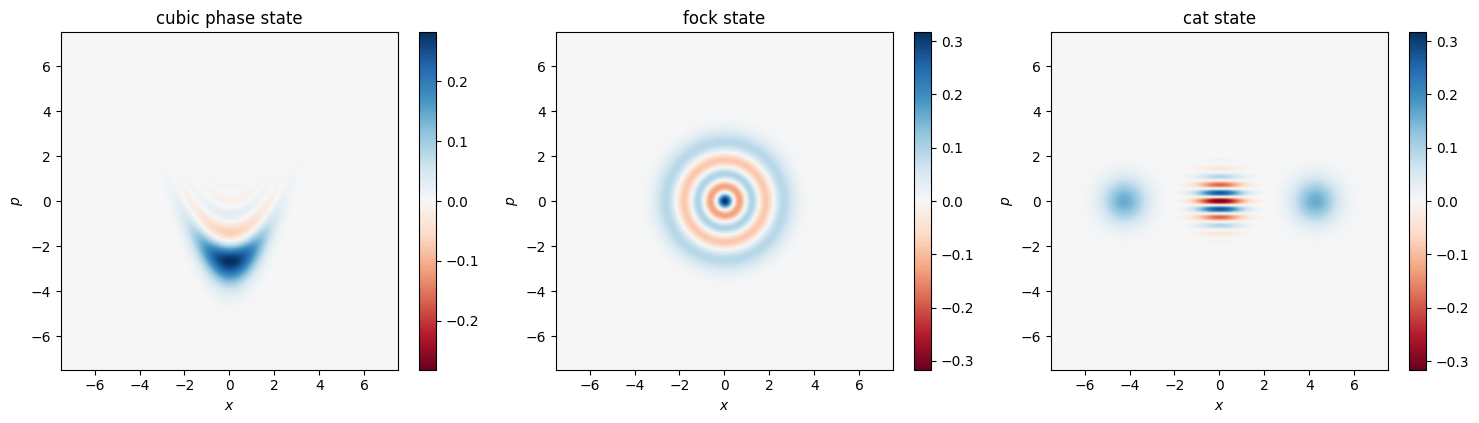

In [2]:
# phase-space grid dimension (-rl/2, rl/2) x (-rl/2 x rl/2)
rl = 15
nr = 1000 #number of points

# cubic phase state
gamma = 0.5
disp = (0, -3)
sq = 1.5
wcubic = wig.wigner_cubic_phase(gamma, rl, nr, disp, sq)
print('Norm wcubic: ', meas.integrate_2d(wcubic, rl)) #norm check
print('Purity wcubic: ', meas.purity(wcubic, rl)) #purity check

# fock state
n = 4
wfock = wig.wigner_fock(4, rl, nr)
print('Norm wfock: ', meas.integrate_2d(wcubic, rl)) #norm check
print('Purity wfock: ', meas.purity(wcubic, rl)) #purity check

# cat-state
alpha = 3
alpha_list = [alpha, -alpha]
amplitudes_list = [1, -1]
wcat = wig.wigner_coherent_superposition(alpha_list, amplitudes_list, rl, nr)
print('Norm wcat: ', meas.integrate_2d(wcat, rl)) #norm check
print('Purity wcat: ', meas.purity(wcat, rl)) #purity check

# plotting
qplot.plot_2d([wcubic, wfock, wcat], rl, titles=['cubic phase state', 'fock state', 'cat state'])


Negative volume wcubic:  0.1169343420066403
Negative volume wfock:  0.5956742292690815
Negative volume wcat:  0.3168837668017219


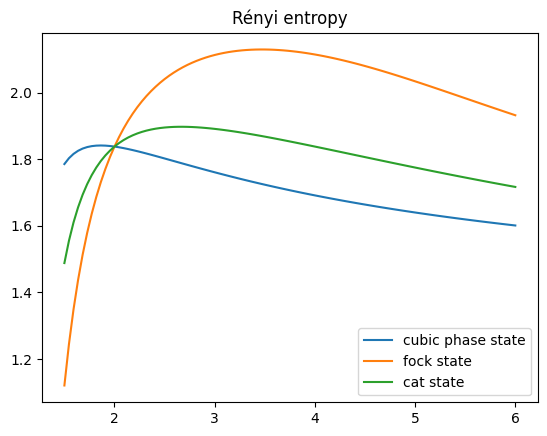

In [3]:
# computing negative volumes
print('Negative volume wcubic: ', meas.negative_volume(wcubic, rl))
print('Negative volume wfock: ', meas.negative_volume(wfock, rl))
print('Negative volume wcat: ', meas.negative_volume(wcat, rl))

# computing Rényi entropies
na = 100
alist = np.linspace(1.5, 6, na)

renyi_wcubic = np.zeros(na)
renyi_wfock = np.zeros(na)
renyi_wcat = np.zeros(na)

for i in range(na):
    ai = alist[i]
    renyi_wcubic[i] = meas.renyi_entropy_2d(wcubic, rl, ai)
    renyi_wfock[i] = meas.renyi_entropy_2d(wfock, rl, ai)
    renyi_wcat[i] = meas.renyi_entropy_2d(wcat, rl, ai)
    
plt.plot(alist, renyi_wcubic, label='cubic phase state')
plt.plot(alist, renyi_wfock, label='fock state')
plt.plot(alist, renyi_wcat, label='cat state')
plt.title('Rényi entropy')
plt.legend()
plt.show()

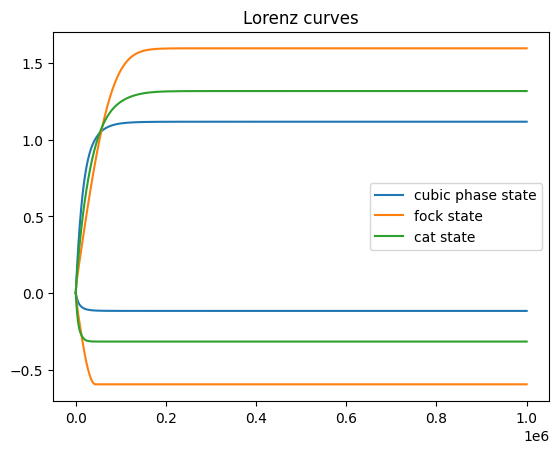

In [5]:
lorenz_dec_wcubic = mjz.lorenz_decreasing_2d(wcubic, rl)
lorenz_inc_wcubic = mjz.lorenz_increasing_2d(wcubic, rl)
lorenz_dec_wfock = mjz.lorenz_decreasing_2d(wfock, rl)
lorenz_inc_wfock = mjz.lorenz_increasing_2d(wfock, rl)
lorenz_dec_wcat = mjz.lorenz_decreasing_2d(wcat, rl)
lorenz_inc_wcat = mjz.lorenz_increasing_2d(wcat, rl)


plt.plot(lorenz_dec_wcubic, color='tab:blue', label='cubic phase state')
plt.plot(lorenz_inc_wcubic, color='tab:blue')
plt.plot(lorenz_dec_wfock, color='tab:orange', label='fock state')
plt.plot(lorenz_inc_wfock, color='tab:orange')
plt.plot(lorenz_dec_wcat, color='tab:green', label='cat state')
plt.plot(lorenz_inc_wcat, color='tab:green')
plt.title('Lorenz curves')
plt.legend()
plt.show()